11
0.0


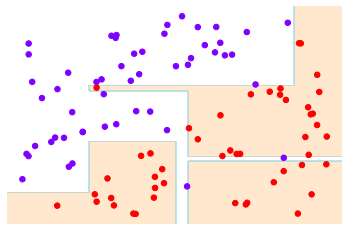

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier


def data(path: str):
    data = np.genfromtxt(path)
    y, X = data[:, -1], data[:, :-1]
    return X, y


def visualize_classifier(model, x_train, y_train,x_test=None,y_test=None, ax=None, cmap="rainbow"):
    ax = ax or plt.gca()
    try:
      if len(x_test) != 0 != len(y_test) :
        ax.scatter(x_test[:, 0], x_test[:, 1], c=y_test, s=30, cmap=cmap,
                   clim=(y_test.min(), y_test.max()), zorder=3)
    except:
        ax.scatter(x_train[:, 0], x_train[:, 1], c=y_train, s=30, cmap=cmap,
                clim=(y_train.min(), y_train.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    model.fit(x_train, y_train)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    n_classes = len(np.unique(y_train))
    contours = ax.contourf(xx, yy, Z, alpha=0.3, levels=np.arange(
        n_classes+1)-0.5, cmap=cmap, zorder=1)
    ax.set(xlim=xlim, ylim=ylim)


x_train, y_train = data("hw3_dectree_train.dat")
x_test, y_test = data("hw3_dectree_test.dat")
tree = DecisionTreeClassifier().fit(x_train, y_train)
print(tree.get_n_leaves())
print(np.count_nonzero(y_train != tree.predict(x_train))/len(y_train))
visualize_classifier(tree, x_train, y_train)

0.126


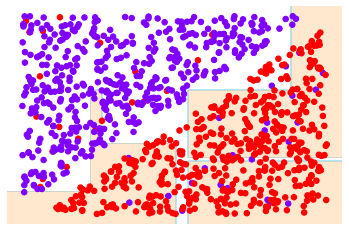

In [14]:
visualize_classifier(tree, x_train, y_train, x_test, y_test)
print(np.count_nonzero(y_test != tree.predict(x_test))/len(y_test))

In [17]:
T, N = 300, 1

In [ ]:
tree = DecisionTreeClassifier()

In [15]:
bag = BaggingClassifier(tree, n_estimators=1, max_samples=1.0, bootstrap=True)
err = 0
for i in range(T*N):
    bag.fit(x_train, y_train)
    err += np.count_nonzero(y_train != bag.predict(x_train))/len(y_train)
print(err/T/N)

0.05224333333333363


0.0


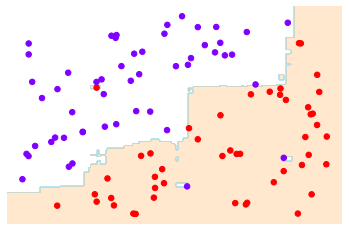

In [18]:
bag = BaggingClassifier(tree, n_estimators=T, max_samples=1.0, bootstrap=True)
Ein= 0
for i in range(N):
    bag.fit(x_train, y_train)
    Ein += np.count_nonzero(y_train != bag.predict(x_train))/len(y_train)
    visualize_classifier(bag, x_train, y_train)
print(Ein/N)

0.072


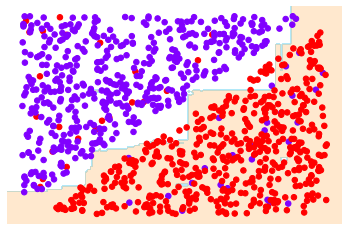

In [ ]:
Eout = 0
for i in range(N):
    bag.fit(x_train, y_train)
    Eout += np.count_nonzero(y_test != bag.predict(x_test))/len(y_test)
    visualize_classifier(bag, x_train, y_train, x_test, y_test)
print(Eout/N)

In [20]:
tree = DecisionTreeClassifier(max_depth=1)

0.13


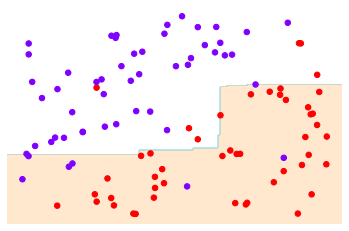

In [21]:
bag = BaggingClassifier(tree, n_estimators=T, max_samples=1.0, bootstrap=True)
Ein= 0
for i in range(N):
    bag.fit(x_train, y_train)
    Ein += np.count_nonzero(y_train != bag.predict(x_train))/len(y_train)
    visualize_classifier(bag, x_train, y_train)
print(Ein/N)

0.162


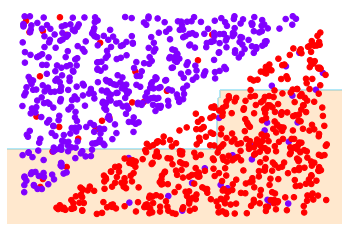

In [22]:
Eout = 0
for i in range(N):
    bag.fit(x_train, y_train)
    Eout += np.count_nonzero(y_test != bag.predict(x_test))/len(y_test)
    visualize_classifier(bag, x_train, y_train, x_test, y_test)
print(Eout/N)